In [52]:
import yfinance as yf
import pandas as pd
import datetime
from pandas_datareader import data as pdr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [53]:
# The tech stocks we'll use for this analysis
tech_list = ['Z74.SI']

# Set up End and Start times for data grab
df = pd.DataFrame()
end = datetime.datetime(2022,12,31)
start = datetime.datetime(2020,1,1)

for stock in tech_list:
    df = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [54]:
df = df.reset_index()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,3.39,3.40,3.36,3.40,3.076397,10742600
1,2020-01-03,3.41,3.41,3.34,3.37,3.049252,15917300
2,2020-01-06,3.36,3.37,3.34,3.35,3.031155,13793100
3,2020-01-07,3.35,3.36,3.30,3.36,3.040204,25232800
4,2020-01-08,3.30,3.39,3.30,3.39,3.067348,28451400
...,...,...,...,...,...,...,...
750,2022-12-23,2.58,2.59,2.56,2.57,2.570000,8518500
751,2022-12-27,2.59,2.60,2.58,2.58,2.580000,6353800
752,2022-12-28,2.58,2.59,2.56,2.58,2.580000,9060100
753,2022-12-29,2.57,2.57,2.55,2.56,2.560000,15897600


In [55]:
singtel_tweets = pd.read_csv('singtelCleaned.csv')

In [56]:
singtel_tweets

,Datetime,Text,Username,likeCount,Date,cleanedText,score,negative,neutral,positive,compound,week,year
0,2021-01-01 13:27:39+00:00,Singtel announces reorganisation of structure ...,datamanagepro,3,2021-01-01,singtel announces reorganisation structure cap...,"{'neg': 0.0, 'neu': 0.729, 'pos': 0.271, 'comp...",0.000,0.729,0.271,0.3818,53,2020
1,2021-01-01 02:04:37+00:00,Singtel announces reorganisation of structure ...,datamanagepro,3,2021-01-01,singtel announces reorganisation structure cap...,"{'neg': 0.0, 'neu': 0.729, 'pos': 0.271, 'comp...",0.000,0.729,0.271,0.3818,53,2020
2,2021-01-01 19:45:19+00:00,@NtzBeaker09 @MakeUpAPnFFan I agree. I live in...,kbhasi,2,2021-01-01,agree live singapore disney removed channels s...,"{'neg': 0.064, 'neu': 0.822, 'pos': 0.114, 'co...",0.064,0.822,0.114,0.2732,53,2020
3,2021-01-01 02:15:00+00:00,.@Singtel revamps structure to capture new dig...,BusinessTimes,1,2021-01-01,revamps structure capture new digital growth g...,"{'neg': 0.0, 'neu': 0.755, 'pos': 0.245, 'comp...",0.000,0.755,0.245,0.3818,53,2020
4,2021-01-01 17:38:11+00:00,Singtel to capture ‘new digital growth’ with n...,AvrilBellon,0,2021-01-01,singtel capture new digital growth new portfol...,"{'neg': 0.0, 'neu': 0.776, 'pos': 0.224, 'comp...",0.000,0.776,0.224,0.3818,53,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17519,2022-12-31 15:50:19+00:00,fuck singtel srs,igloosias,3,2022-12-31,fuck singtel srs,"{'neg': 0.636, 'neu': 0.364, 'pos': 0.0, 'comp...",0.636,0.364,0.000,-0.5423,52,2022
17520,2022-12-31 16:55:29+00:00,Singtel start pattern ready,teh_papi,1,2022-12-31,singtel start pattern ready,"{'neg': 0.0, 'neu': 0.545, 'pos': 0.455, 'comp...",0.000,0.545,0.455,0.3612,52,2022
17521,2022-12-31 18:25:28+00:00,@SingtelSupport Same and only at this location...,KelvinChow1917,0,2022-12-31,location network speed gets normal getting inw...,"{'neg': 0.0, 'neu': 0.746, 'pos': 0.254, 'comp...",0.000,0.746,0.254,0.7003,52,2022
17522,2022-12-31 15:40:02+00:00,@Singtel terrible connections at Sembawang bea...,KelvinChow1917,0,2022-12-31,terrible connections sembawang beach area much...,"{'neg': 0.307, 'neu': 0.693, 'pos': 0.0, 'comp...",0.307,0.693,0.000,-0.4767,52,2022


In [57]:
singtel_tweets = singtel_tweets.groupby('Date').agg('mean')

In [58]:
df['Date'] = df['Date'].astype(str)

In [59]:
result = singtel_tweets.merge(df,left_on='Date',right_on='Date')

In [60]:
result

,Date,likeCount,negative,neutral,positive,compound,week,year,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,3.466667,0.075667,0.816733,0.107600,0.090227,1.0,2021.0,2.32,2.33,2.30,2.31,2.182576,19802200
1,2021-01-05,0.550000,0.061100,0.756350,0.182550,0.232310,1.0,2021.0,2.31,2.32,2.29,2.32,2.192024,31961800
2,2021-01-06,3.647059,0.058118,0.849706,0.092176,0.113788,1.0,2021.0,2.31,2.32,2.27,2.30,2.173128,35704600
3,2021-01-07,0.375000,0.020750,0.849063,0.130188,0.185175,1.0,2021.0,2.31,2.40,2.29,2.40,2.267612,69034700
4,2021-01-08,0.300000,0.046700,0.760400,0.192900,0.289230,1.0,2021.0,2.42,2.46,2.39,2.46,2.324302,66271300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,2022-12-23,1.187500,0.144125,0.710500,0.145375,0.040650,51.0,2022.0,2.58,2.59,2.56,2.57,2.570000,8518500
499,2022-12-27,0.333333,0.068583,0.789917,0.141500,0.144108,52.0,2022.0,2.59,2.60,2.58,2.58,2.580000,6353800
500,2022-12-28,5.352941,0.083647,0.759588,0.156706,0.181253,52.0,2022.0,2.58,2.59,2.56,2.58,2.580000,9060100
501,2022-12-29,1.379310,0.097448,0.779793,0.122759,0.104248,52.0,2022.0,2.57,2.57,2.55,2.56,2.560000,15897600


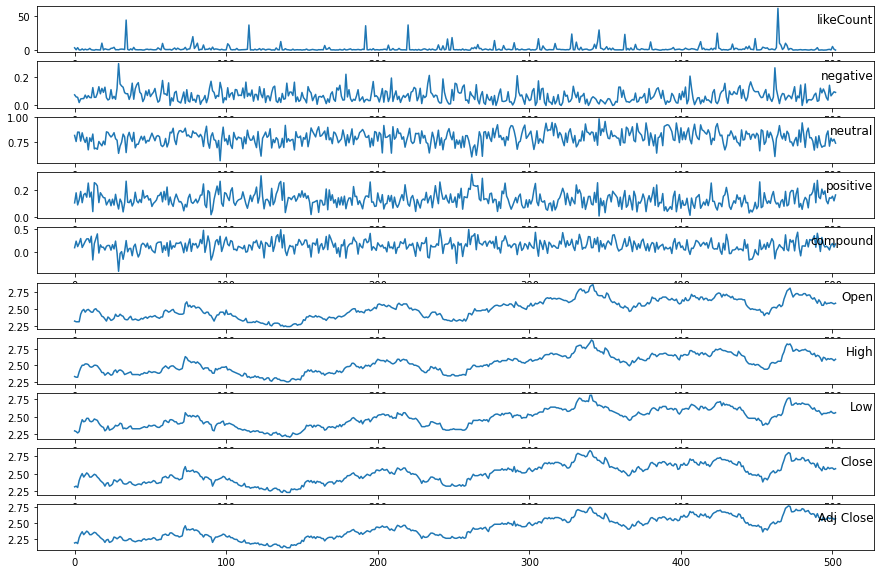

In [61]:
from pandas import read_csv
from matplotlib import pyplot
# load dataset
values = result.values
# specify columns to plot
groups = [1, 2, 3, 4, 5, 8,  9, 10, 11, 12]
i = 1
# plot each column
pyplot.figure(figsize=(15,10))
for group in groups:
 pyplot.subplot(len(groups), 1, i)
 pyplot.plot(values[:, group])
 pyplot.title(result.columns[group], y=0.5, loc='right')
 i += 1
pyplot.show()

In [62]:
from sklearn.preprocessing import MinMaxScaler

columns = ['likeCount', 'negative', 'neutral', 'positive', 'compound', 'Open', 'High', 'Low', 'Close', 'Adj Close']
values = result[columns].astype('float32')
Y = values.filter(items=['Adj Close'])
X = values.filter(columns).drop(columns='Adj Close')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)
Y_scaled = scaler.fit_transform(Y)


In [63]:
len(X)

503

In [64]:
split = 335
x_train, x_test = X_scaled[:335,:], X_scaled[335:,:]
y_train, y_test = Y_scaled[:335,:], Y_scaled[335:,:]

In [65]:
train_X = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
test_X = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))
print(train_X.shape, y_train.shape, test_X.shape, y_test.shape)

(335, 1, 9) (335, 1) (168, 1, 9) (168, 1)


In [66]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Try running LSTM on just stock data first

In [67]:
x_stock = X.drop(columns=['likeCount','negative','neutral','positive','compound'])
X_stock_scaled = scaler.fit_transform(x_stock)
x_stock_train, x_stock_test = X_stock_scaled[:335,:], X_stock_scaled[335:,:]
Y_scaled = scaler.fit_transform(Y)

train_X_stock = x_stock_train.reshape((x_stock_train.shape[0], 1, x_stock_train.shape[1]))
test_X_stock = x_stock_test.reshape((x_stock_test.shape[0], 1, x_stock_test.shape[1]))
print(train_X_stock.shape, y_train.shape, test_X_stock.shape, y_test.shape)


(335, 1, 4) (335, 1) (168, 1, 4) (168, 1)


Epoch 1/50
5/5 - 2s - loss: 0.2859 - accuracy: 0.0119 - val_loss: 0.5896 - val_accuracy: 0.0000e+00 - 2s/epoch - 491ms/step
Epoch 2/50
5/5 - 0s - loss: 0.2511 - accuracy: 0.0119 - val_loss: 0.5372 - val_accuracy: 0.0000e+00 - 40ms/epoch - 8ms/step
Epoch 3/50
5/5 - 0s - loss: 0.2165 - accuracy: 0.0119 - val_loss: 0.4839 - val_accuracy: 0.0000e+00 - 43ms/epoch - 9ms/step
Epoch 4/50
5/5 - 0s - loss: 0.1820 - accuracy: 0.0119 - val_loss: 0.4291 - val_accuracy: 0.0000e+00 - 43ms/epoch - 9ms/step
Epoch 5/50
5/5 - 0s - loss: 0.1481 - accuracy: 0.0119 - val_loss: 0.3725 - val_accuracy: 0.0000e+00 - 42ms/epoch - 8ms/step
Epoch 6/50
5/5 - 0s - loss: 0.1158 - accuracy: 0.0119 - val_loss: 0.3145 - val_accuracy: 0.0000e+00 - 41ms/epoch - 8ms/step
Epoch 7/50
5/5 - 0s - loss: 0.0864 - accuracy: 0.0119 - val_loss: 0.2563 - val_accuracy: 0.0000e+00 - 41ms/epoch - 8ms/step
Epoch 8/50
5/5 - 0s - loss: 0.0659 - accuracy: 0.0119 - val_loss: 0.2036 - val_accuracy: 0.0000e+00 - 57ms/epoch - 11ms/step
Epoch 9

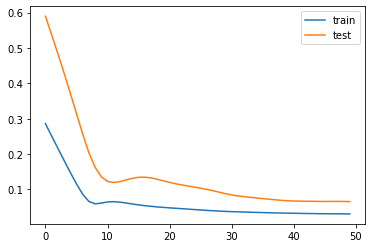

In [68]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X_stock.shape[1], train_X_stock.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam',metrics=['accuracy'])
# fit network
history = model.fit(train_X_stock, y_train, epochs=50, batch_size=72, validation_data=(test_X_stock, y_test), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [69]:
predictions = model.predict(test_X_stock)
predictions = scaler.inverse_transform(predictions)
predictions = predictions[:,0]

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

6/6 [==============================] - 0s 2ms/step


1.8439547

C:\Users\eliga\AppData\Local\Temp/ipykernel_7636/1729152394.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


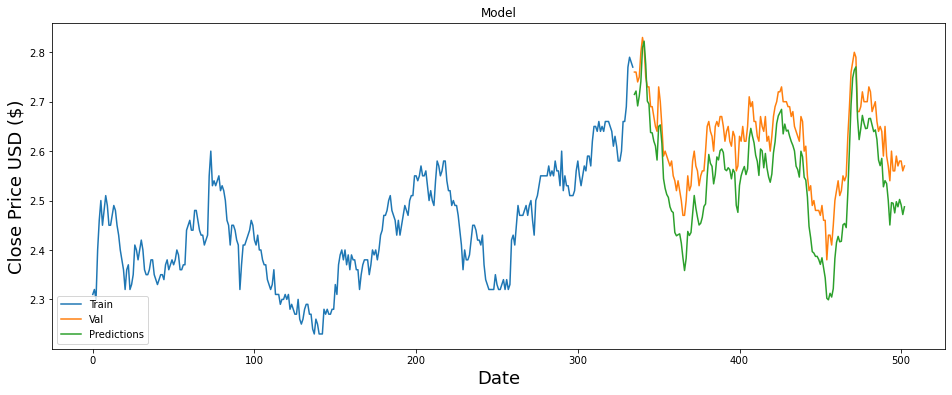

In [70]:
train = result[:335]
valid = result[335:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower left')
plt.show()

Epoch 1/50
5/5 - 2s - loss: 0.3138 - accuracy: 0.0119 - val_loss: 0.6528 - val_accuracy: 0.0000e+00 - 2s/epoch - 495ms/step
Epoch 2/50
5/5 - 0s - loss: 0.2569 - accuracy: 0.0119 - val_loss: 0.5764 - val_accuracy: 0.0000e+00 - 52ms/epoch - 10ms/step
Epoch 3/50
5/5 - 0s - loss: 0.2050 - accuracy: 0.0119 - val_loss: 0.5002 - val_accuracy: 0.0000e+00 - 52ms/epoch - 10ms/step
Epoch 4/50
5/5 - 0s - loss: 0.1584 - accuracy: 0.0119 - val_loss: 0.4242 - val_accuracy: 0.0000e+00 - 42ms/epoch - 8ms/step
Epoch 5/50
5/5 - 0s - loss: 0.1216 - accuracy: 0.0119 - val_loss: 0.3532 - val_accuracy: 0.0000e+00 - 45ms/epoch - 9ms/step
Epoch 6/50
5/5 - 0s - loss: 0.1057 - accuracy: 0.0119 - val_loss: 0.2941 - val_accuracy: 0.0000e+00 - 38ms/epoch - 8ms/step
Epoch 7/50
5/5 - 0s - loss: 0.1034 - accuracy: 0.0119 - val_loss: 0.2525 - val_accuracy: 0.0000e+00 - 45ms/epoch - 9ms/step
Epoch 8/50
5/5 - 0s - loss: 0.1059 - accuracy: 0.0119 - val_loss: 0.2282 - val_accuracy: 0.0000e+00 - 51ms/epoch - 10ms/step
Epoch

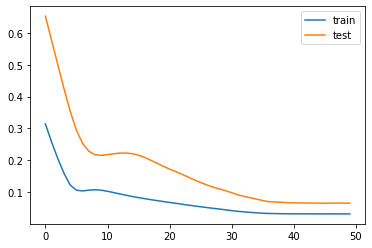

In [71]:

# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam',metrics=['accuracy'])
# fit network
history = model.fit(train_X, y_train, epochs=50, batch_size=72, validation_data=(test_X, y_test), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [72]:
predictions = model.predict(test_X)
predictions = scaler.inverse_transform(predictions)
predictions = predictions[:,0]

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

6/6 [==============================] - 0s 2ms/step


1.8466736

In [73]:
result

,Date,likeCount,negative,neutral,positive,compound,week,year,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,3.466667,0.075667,0.816733,0.107600,0.090227,1.0,2021.0,2.32,2.33,2.30,2.31,2.182576,19802200
1,2021-01-05,0.550000,0.061100,0.756350,0.182550,0.232310,1.0,2021.0,2.31,2.32,2.29,2.32,2.192024,31961800
2,2021-01-06,3.647059,0.058118,0.849706,0.092176,0.113788,1.0,2021.0,2.31,2.32,2.27,2.30,2.173128,35704600
3,2021-01-07,0.375000,0.020750,0.849063,0.130188,0.185175,1.0,2021.0,2.31,2.40,2.29,2.40,2.267612,69034700
4,2021-01-08,0.300000,0.046700,0.760400,0.192900,0.289230,1.0,2021.0,2.42,2.46,2.39,2.46,2.324302,66271300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,2022-12-23,1.187500,0.144125,0.710500,0.145375,0.040650,51.0,2022.0,2.58,2.59,2.56,2.57,2.570000,8518500
499,2022-12-27,0.333333,0.068583,0.789917,0.141500,0.144108,52.0,2022.0,2.59,2.60,2.58,2.58,2.580000,6353800
500,2022-12-28,5.352941,0.083647,0.759588,0.156706,0.181253,52.0,2022.0,2.58,2.59,2.56,2.58,2.580000,9060100
501,2022-12-29,1.379310,0.097448,0.779793,0.122759,0.104248,52.0,2022.0,2.57,2.57,2.55,2.56,2.560000,15897600


C:\Users\eliga\AppData\Local\Temp/ipykernel_7636/1729152394.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


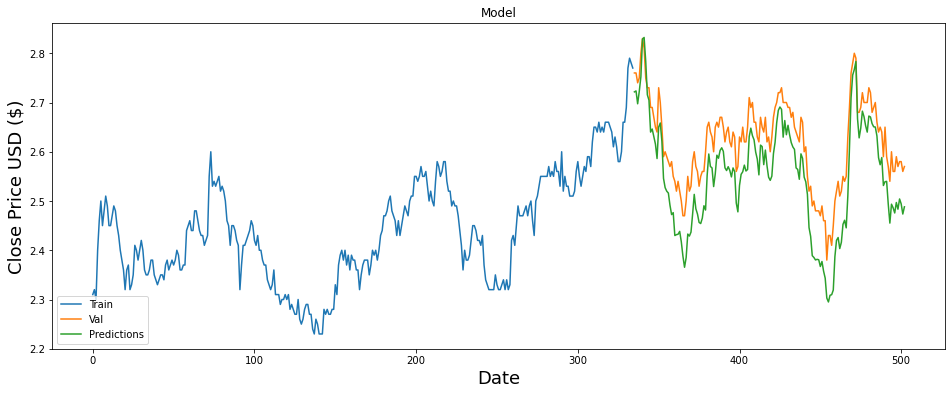

In [74]:
train = result[:335]
valid = result[335:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower left')
plt.show()